# 분류(Classification)
### 01_의사결정나무(Decision Tree)

In [232]:
# 필요 라이브러리 임포트
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 전처리
from sklearn.cross_validation import train_test_split
# 모델 설정
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 알고리즘 적용을 위한 라이브러리
# 모델 평가
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
# 모델 최적화
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# IPython에서 이미지 출력
from IPython.display import Image
## Matplotlib에서 한글 사용
from matplotlib import font_manager, rc
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
## Numpy 배열의 출력환경
np.set_printoptions(linewidth=400)    # 화면 너비 지정
np.set_printoptions(threshold=np.inf) # 전체 Numpy 배열 출력
## Graphviz 사용
from sklearn.tree import export_graphviz # Dot Language를 이용한 시각화

Automatically created module for IPython interactive environment


## 분석대상 데이터 로드

In [233]:
# 분석대상 데이터 로드 및 확인
df_data = pd.read_csv('z:/big_data/python/lect_supp/UniversalBank.txt')
df_data.info() # 로드된 훈련 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## 데이터 탐색

In [234]:
# 로드 데이터 기술통계량 확인
df_data.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [235]:
# 대출 프로모션 반응여부별 평균 확인
df_data.groupby('Personal_Loan').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.728982,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905347,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [236]:
# 교육수준별 평균 확인
df_data.groupby('Education').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Education,,,,,,,,,,,,,
1,2473.121660,44.963740,20.065363,85.586355,93147.202767,2.236164,2.260846,61.627385,0.044370,0.106870,0.056298,0.598760,0.302004
2,2489.587313,45.039914,19.770492,64.313614,93278.676408,2.652174,1.685020,51.319316,0.129722,0.106914,0.062723,0.612972,0.285103
3,2548.931379,46.140573,20.471686,66.122585,93041.968688,2.381079,1.723351,54.178548,0.136576,0.098601,0.063957,0.578947,0.291139


In [237]:
# 신용카드 사용여부별 평균 확인
df_data.groupby('CreditCard').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online
CreditCard,,,,,,,,,,,,,
0,2484.639377,45.281586,20.038244,73.845042,93141.972521,2.387819,1.945453,1.886969,56.973371,0.095467,0.107365,0.017564,0.595467
1,2538.587075,45.474830,20.263946,73.604082,93177.790476,2.417007,1.919807,1.866667,55.359184,0.097279,0.097279,0.163265,0.600000


In [238]:
# 증권계좌 보유여부별 평균 확인
df_data.groupby('Securities_Account').mean()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,CD_Account,Online,CreditCard
Securities_Account,,,,,,,,,,,,,
0,2508.864002,45.340107,20.109424,73.815319,93149.095355,2.388566,1.928912,1.884100,56.686690,0.093792,0.034614,0.594685,0.296338
1,2428.749042,45.323755,20.063218,73.421456,93181.735632,2.463602,2.015134,1.854406,54.886973,0.114943,0.281609,0.614943,0.273946


Text(0,0.5,'Frequency')

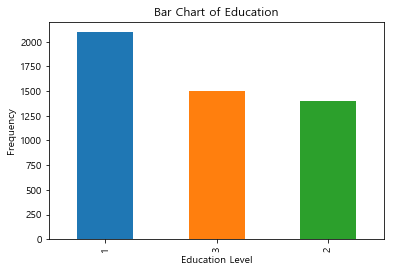

In [239]:
# 교육수준에 대한 막대그래프를 이용한 파악
df_data.Education.value_counts().plot(kind='bar')
plt.title('Bar Chart of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

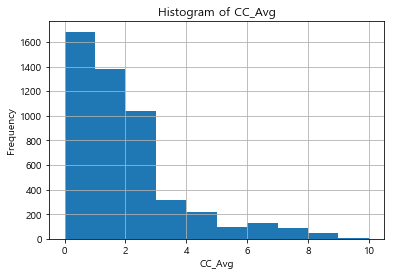

In [240]:
# 월 평균 신용카드 지출액에 대한 히스토그램을 이용한 파악
df_data.CCAvg.hist()
plt.title('Histogram of CC_Avg')
plt.xlabel('CC_Avg')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

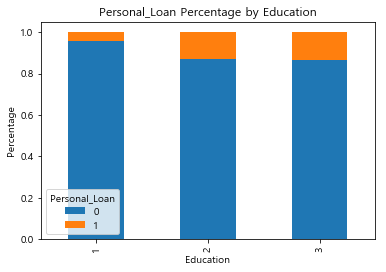

In [241]:
# 개인대출 프로모션 반응여부별 월 평균 신용카드 지출액의 누적 막대그래프를 이용한 파악
Personal_Loan_Education = pd.crosstab(df_data.Education, df_data.Personal_Loan)
Personal_Loan_Education.div(Personal_Loan_Education.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Personal_Loan Percentage by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')

## 데이터 전처리

In [242]:
# 분석 비대상 데이터 제거
df_data = df_data.drop(df_data.columns[[0, 4]], axis=1)
df_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [243]:
# 데이터에서 레이블 변수 분리
df_data_label = df_data.Personal_Loan
df_data_label.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [244]:
# 데이터에서 특성 변수 분리
df_data_feature = df_data.iloc[:,[0,1,3,5,9]]
df_data_feature.head()

,Age,Experience,Family,Education,CD_Account
0,25,1,4,1,0
1,45,19,3,1,0
2,39,15,1,1,0
3,35,9,1,2,0
4,35,8,4,2,0


In [245]:
# 훈련 및 검증 데이터 분할추출
X_train, X_test, y_train, y_test = train_test_split(df_data_feature, df_data_label, test_size=0.25) #, random_state=1234)

In [246]:
# 훈련 데이터의 특성 값 확인
X_train.head()

,Age,Experience,Family,Education,CD_Account
2260,39,14,2,2,0
3757,45,21,1,2,0
1037,35,11,1,2,0
2055,49,23,1,3,0
326,52,27,1,3,1


In [247]:
# 훈련 데이터의 특성 값 갯수 확인
len(X_train)

3750

In [248]:
# 검증 데이터의 특성 값 확인
X_test.head()

,Age,Experience,Family,Education,CD_Account
780,32,7,4,1,0
3173,34,10,1,1,0
1183,50,25,3,2,0
1837,43,18,3,1,0
2519,60,36,2,1,0


In [249]:
# 검증 데이터의 특성 갯수 확인
len(X_test)

1250

In [250]:
# 훈련 데이터의 레이블 값 확인
y_train.head()

2260    0
3757    1
1037    0
2055    0
326     0
Name: Personal_Loan, dtype: int64

In [251]:
# 훈련 데이터의 레이블 갯수 확인
len(y_train)

3750

In [252]:
# 검증 데이터의 레이블 값 확인
y_test.head()

780     0
3173    0
1183    0
1837    0
2519    0
Name: Personal_Loan, dtype: int64

In [253]:
# 검증 데이터의 레이블 갯수 확인
len(y_test)

1250

## 모델 설정

In [279]:
# 모델 설정
model = DecisionTreeClassifier(
                               #class_weight=None,
                               #criterion='gini',
                               max_depth=3,
                               #max_features=None,
                               max_leaf_nodes=7,
                               #min_impurity_decrease=0.0,
                               #min_impurity_split=None,
                               #min_samples_leaf=1,
                               #min_samples_split=2,
                               #min_weight_fraction_leaf=0.0,
                               #presort=False,random_state=None,
                               #splitter='best'
                               )
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [280]:
# 설정된 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [281]:
# 모델에 검증 데이터를 적용한 예측
y_pred = model.predict(X_test)

## 모델 평가

In [282]:
# 훈련 데이터 활용 모델 평가
print("** Model Evaluation **\n")
#confusion_matrix = confusion_matrix(y_test, y_pred)
#confusion_matrix
#true_negative, false_positive, false_negative, true_positive = confusion_matrix( y_true=df_TestLabels, y_pred=df_TestLabelsPred ).ravel()
#df_freq = pd.value_counts(y_test['Y2']).to_frame().reset_index()
df_freq = pd.value_counts(y_test).to_frame().reset_index()
print("[Frequency]\n", df_freq)
print("\n[Evaluation Score]")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='binary'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='binary'))

** Model Evaluation **

[Frequency]
    index  Personal_Loan
0      0           1137
1      1            113

[Evaluation Score]
Accuracy: 0.9216
Precision: 0.6415094339622641
Recall: 0.3008849557522124
F1 Score: 0.4096385542168675


In [283]:
# 검증 데이터 활용 모델 평가
t_lable = y_test.replace([0, 1], ['No', 'Yes']).unique()
print("[Classification Report]\n")
print(classification_report(y_test, y_pred, target_names=t_lable))

[Classification Report]

             precision    recall  f1-score   support

         No       0.93      0.98      0.96      1137
        Yes       0.64      0.30      0.41       113

avg / total       0.91      0.92      0.91      1250



In [284]:
# 특성 중요도 추출
importances = model.feature_importances_
sorted_importances = np.argsort(importances)
sorted_importances

array([1, 0, 2, 3, 4], dtype=int64)

In [285]:
# 컬럼명에 따른 특성 중요도 확인
feature_names = X_test.columns.values
print("Feature Importance")
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), feature_names), reverse=True))
padding = np.arange(len(feature_names)) + 0.5

Feature Importance
[(0.6372, 'CD_Account'), (0.22, 'Education'), (0.1186, 'Family'), (0.0241, 'Age'), (0.0, 'Experience')]


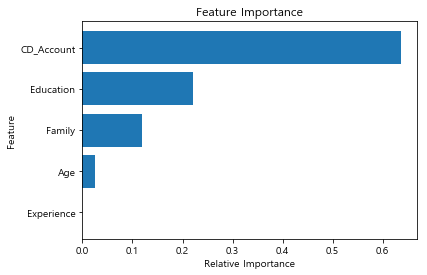

In [286]:
# 특성 중요도 시각화
plt.figure(1)
plt.barh(padding, importances[sorted_importances], align='center')
plt.yticks(padding, feature_names[sorted_importances])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

[ROC]

FPR [0.         0.01671064 1.        ]
TPR [0.         0.30088496 1.        ]


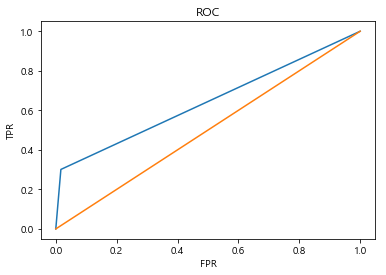

true_negative, false_positive, false_negative, true_positive
 1118 19 79 34
             precision    recall  f1-score   support

          0       0.93      0.98      0.96      1137
          1       0.64      0.30      0.41       113

avg / total       0.91      0.92      0.91      1250



In [287]:
# ROC 커브 확인
print("[ROC]\n")
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_pred)
print("FPR", fpr)
print("TPR", tpr)
plt.figure(2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
true_negative, false_positive, false_negative, true_positive = confusion_matrix( y_true=y_test, y_pred=y_pred).ravel()
print('true_negative, false_positive, false_negative, true_positive\n', true_negative, false_positive, false_negative, true_positive)
print(classification_report(y_true=y_test, y_pred=y_pred))

In [288]:
# 교차검증
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.88015979 0.88015979 0.89066667 0.89586115 0.87983979]
0.8853374350295141


## 모델 최적화

In [289]:
# GridSearchCV를 이용한 모델 튜닝
param_grid = {'max_leaf_nodes': np.arange(3, 10)}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid)
gs.fit(X_train, y_train)
gs_pred = gs.predict_proba(X_test)[:, 1]
gs_performance = roc_auc_score(y_test, y_pred)
print('DecisionTree: Area under the ROC curve = {}'.format(gs_performance))
gs.best_params_

DecisionTree: Area under the ROC curve = 0.6420871568558776


{'max_leaf_nodes': 6}

## 결과 해석

['Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Education' 'Mortgage' 'Personal_Loan' 'Securities_Account' 'CD_Account' 'Online' 'CreditCard']


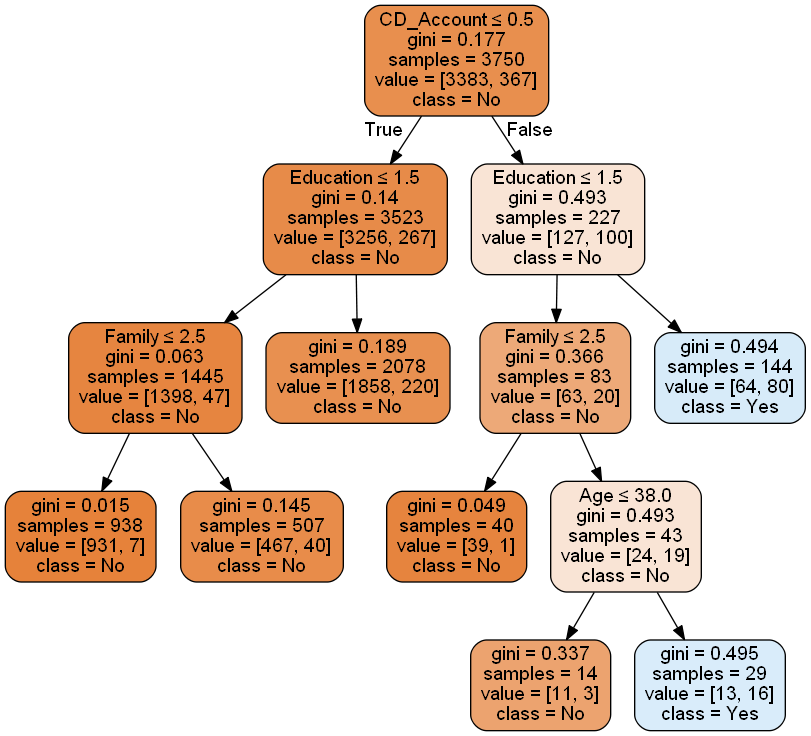

In [290]:
# 도출된 모델의 규칙 파악
print(df_data.columns.values)
dot_data = tree.export_graphviz(model, out_file="decision_tree.dot", feature_names=X_test.columns.values, class_names=t_lable, filled=True, rounded=True, special_characters=True)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X_test.columns.values, class_names=t_lable)
get_ipython().system('dot.exe -Tpng decision_tree.dot > decision_tree.png')
Image("decision_tree.png")
#print(graphviz.Source(dot_data))
#graphviz.Source(dot_data).render("decision_tree")

### End of Document